# Quickstart

This notebook describes a minimal example. First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [41]:
%matplotlib inline
import numpy as np
import daskperiment

First, create `daskperiment.Experiment` instance. This instance controlls an experiment, a chain of functions to output value and a collection of input variables.

In [2]:
ex = daskperiment.Experiment(id='quickstart_pj')
ex

2019-02-28 08:08:39,752 [daskperiment.core.experiment] [INFO] Initialized new experiment: Experiment(id: quickstart_pj, trial_id: 0, backend: LocalBackend('daskperiment_cache/quickstart_pj'))
2019-02-28 08:08:39,912 [daskperiment.environment.environment] [INFO] Platform Information: Darwin-17.7.0-x86_64-i386-64bit
2019-02-28 08:08:39,915 [daskperiment.environment.environment] [INFO] Device CPU Count: 4
2019-02-28 08:08:39,916 [daskperiment.environment.environment] [INFO] Python Implementation: CPython
2019-02-28 08:08:39,920 [daskperiment.environment.environment] [INFO] Python Version: 3.6.6
2019-02-28 08:08:39,922 [daskperiment.environment.environment] [INFO] Python Shell Mode: Jupyter Notebook
2019-02-28 08:08:39,924 [daskperiment.environment.environment] [INFO] Python venv: False
2019-02-28 08:08:39,926 [daskperiment.environment.environment] [INFO] Daskperiment Version: 0.3.0
2019-02-28 08:08:39,930 [daskperiment.environment.environment] [INFO] Git Repository: /Users/sinhrks/Git/das

Experiment(id: quickstart_pj, trial_id: 0, backend: LocalBackend('daskperiment_cache/quickstart_pj'))

Then, use `Experiment.parameter` method to define parameters (input variables for the experiment). The actual value of each parameter can be changed in every trial.

In [3]:
a = ex.parameter('a')
b = ex.parameter('b')
a

Parameter(a: Undefined)

Next, you can define each experiment step (function) by decorating with `Experiment` instance (`@ex`).

Note that the function to output the final result (mostly objective value to be minimized or maximized) must be decorated with `Experiment.result`. The chain of these functions are expressed as `Dask.Delayed` instance.

In [4]:
@ex
def prepare_data(a, b):
    return a + b 

@ex.result
def calculate_score(s):
    return 10 / s

d = prepare_data(a, b)
s = calculate_score(d)
s

Delayed('calculate_score-82f78baa-1d89-4662-854d-163348d0f0a1')

Thus, you can visualize computation graph via `.visualize` method.

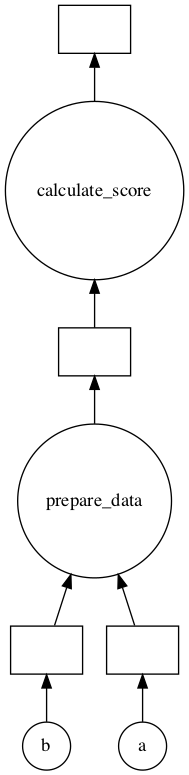

In [5]:
s.visualize()

Use `Experiment.set_parameters` method to set parameters for a trial. After setting parameters, `Parameter` variable and experiment result will be computable.

Parameters are recommended to be a scalar (or lightweight value) because these are stored as history (for example, passing filename as a parameter is　preffered rather than passing `DataFrame`).

In [6]:
ex.set_parameters(a=1, b=2)
a.compute()

2019-02-28 08:08:40,687 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>


1

In [7]:
s.compute()

2019-02-28 08:08:40,732 [daskperiment.core.trial] [INFO] Started Experiment (trial id=1)
2019-02-28 08:08:40,735 [daskperiment.core.experiment] [INFO] Target: calculate_score-82f78baa-1d89-4662-854d-163348d0f0a1
2019-02-28 08:08:40,737 [daskperiment.core.experiment] [INFO] Random seed is not provided, initialized with generated seed: 2387108513
2019-02-28 08:08:40,739 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-28 08:08:40,742 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_1.py
2019-02-28 08:08:40,752 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=1)
2019-02-28 08:08:40,753 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


3.3333333333333335

You can update any parameters for next trial. Every trials can be distinguished by trial id.

In [8]:
ex.set_parameters(b=3)
s.compute()

2019-02-28 08:08:40,768 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=3<class 'int'>
2019-02-28 08:08:40,772 [daskperiment.core.trial] [INFO] Started Experiment (trial id=2)
2019-02-28 08:08:40,774 [daskperiment.core.experiment] [INFO] Target: calculate_score-82f78baa-1d89-4662-854d-163348d0f0a1
2019-02-28 08:08:40,782 [daskperiment.core.experiment] [INFO] Random seed is not provided, initialized with generated seed: 722428913
2019-02-28 08:08:40,784 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=3<class 'int'>
2019-02-28 08:08:40,790 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_2.py
2019-02-28 08:08:40,814 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=2)
2019-02-28 08:08:40,819 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


2.5

In [9]:
ex.get_history()

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,3.333333,True,2019-02-28 08:08:40.751676,00:00:00.019652,NaN
2,1,3,2.500000,True,2019-02-28 08:08:40.814038,00:00:00.042162,NaN


After some trials, you can retrieve parameter values specifying trial id.

In [10]:
ex.get_parameters(trial_id=1)

{'a': 1, 'b': 2}

In [11]:
ex.get_parameters(trial_id=2)

{'a': 1, 'b': 3}

`Experiment.get_history` will return a `DataFrame` which stores a history of trial parameters and its results. You can select desirable trial using `pandas` basic operation.

In [12]:
ex.get_history()

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,3.333333,True,2019-02-28 08:08:40.751676,00:00:00.019652,NaN
2,1,3,2.500000,True,2019-02-28 08:08:40.814038,00:00:00.042162,NaN


When any error occurs during the trial, `Experiment` instance stores the log as failed trial. The "Description" column contains the error detail.

In [13]:
ex.set_parameters(a=1, b=-1)
try:
    s.compute()
    
except ZeroDivisionError as e:
    # To hide stack trace
    print('{}({})'.format(e.__class__.__name__, e))

2019-02-28 08:08:41,018 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=-1<class 'int'>
2019-02-28 08:08:41,026 [daskperiment.core.trial] [INFO] Started Experiment (trial id=3)
2019-02-28 08:08:41,031 [daskperiment.core.experiment] [INFO] Target: calculate_score-82f78baa-1d89-4662-854d-163348d0f0a1
2019-02-28 08:08:41,034 [daskperiment.core.experiment] [INFO] Random seed is not provided, initialized with generated seed: 921008217
2019-02-28 08:08:41,037 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=-1<class 'int'>
2019-02-28 08:08:41,039 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_3.py
2019-02-28 08:08:41,065 [daskperiment.core.experiment] [ERROR] Experiment failed: ZeroDivisionError(division by zero)
2019-02-28 08:08:41,068 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=3)
2019-02-28 08:08:41,070 [daskperiment.backend.local] [INFO] Saving Experiment to file: das

ZeroDivisionError(division by zero)


In [14]:
ex.get_history()

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,3.333333,True,2019-02-28 08:08:40.751676,00:00:00.019652,NaN
2,1,3,2.500000,True,2019-02-28 08:08:40.814038,00:00:00.042162,NaN
3,1,-1,NaN,False,2019-02-28 08:08:41.068351,00:00:00.042146,ZeroDivisionError(division by zero)


Every time the computation performed, `Experiment` instance is automatically saved to specified cache directory. When `Experiment` instance is initialized, it automatically load previous trials (check trial id in the log).

# Handling intermediate result

Next example shows how to retrieve an intermediate result of the chain.

The only difference is using `Experiment.persist` decorator. It makes `Experiment` instance to keep the decorated function's intermediate result. After definition, rebuilt the same workflow using the persisted function. 

Note that an intermediate result is saved as a pickle file named with its function name, function name must be unique in the experiment.

In [15]:
@ex.persist
def prepare_data(a, b):
    return a + b

d = prepare_data(a, b)
s = calculate_score(d)

2019-02-28 08:08:41,132 [daskperiment.core.code] [WARNING] Code context has been changed: prepare_data
2019-02-28 08:08:41,136 [daskperiment.core.code] [WARNING] @@ -1,3 +1,3 @@

2019-02-28 08:08:41,139 [daskperiment.core.code] [WARNING] -@ex
2019-02-28 08:08:41,146 [daskperiment.core.code] [WARNING] +@ex.persist
2019-02-28 08:08:41,154 [daskperiment.core.code] [WARNING]  def prepare_data(a, b):
2019-02-28 08:08:41,158 [daskperiment.core.code] [WARNING] -    return a + b 
2019-02-28 08:08:41,160 [daskperiment.core.code] [WARNING] +    return a + b


NOTE: Also, you can notice that `daskperiment` outputs some "WARNING" indicating code contexts has been changed. It's because `daskperiment` automatically tracks code context to guarantee reproducibility.

Let's perform some trials.

In [16]:
ex.set_parameters(a=1, b=2)
s.compute()

2019-02-28 08:08:41,179 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-28 08:08:41,187 [daskperiment.core.trial] [INFO] Started Experiment (trial id=4)
2019-02-28 08:08:41,191 [daskperiment.core.experiment] [INFO] Target: calculate_score-a30aa1e4-4fb0-48fe-a199-cc23b737be64
2019-02-28 08:08:41,194 [daskperiment.core.experiment] [INFO] Random seed is not provided, initialized with generated seed: 725401846
2019-02-28 08:08:41,198 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-28 08:08:41,200 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_4.py
2019-02-28 08:08:41,240 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=4)
2019-02-28 08:08:41,245 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


3.3333333333333335

In [17]:
ex.set_parameters(a=3, b=2)
s.compute()

2019-02-28 08:08:41,263 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=2<class 'int'>
2019-02-28 08:08:41,268 [daskperiment.core.trial] [INFO] Started Experiment (trial id=5)
2019-02-28 08:08:41,270 [daskperiment.core.experiment] [INFO] Target: calculate_score-a30aa1e4-4fb0-48fe-a199-cc23b737be64
2019-02-28 08:08:41,272 [daskperiment.core.experiment] [INFO] Random seed is not provided, initialized with generated seed: 938377576
2019-02-28 08:08:41,276 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=2<class 'int'>
2019-02-28 08:08:41,279 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_5.py
2019-02-28 08:08:41,295 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=5)
2019-02-28 08:08:41,297 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


2.0

You can retrieve intermediate results via `Experiment.get_persisted` method by specifying function name and trial id.

In [18]:
ex.get_persisted('prepare_data', trial_id=4)

3

In [19]:
ex.get_persisted('prepare_data', trial_id=5)

5

# Monitoring metrics

You may need to monitor transition of some metrics during each trial. In each experiment function, you can call `Experiment.save_metric` to save metric with its key (name) and epoch.

In [20]:
@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        ex.save_metric('dummy_score2', epoch=i, value=10)
        
    return 10 / s

d = prepare_data(a, b)
s = calculate_score(d)

2019-02-28 08:08:41,349 [daskperiment.core.code] [WARNING] Code context has been changed: calculate_score
2019-02-28 08:08:41,350 [daskperiment.core.code] [WARNING] @@ -1,3 +1,7 @@

2019-02-28 08:08:41,353 [daskperiment.core.code] [WARNING]  @ex.result
2019-02-28 08:08:41,355 [daskperiment.core.code] [WARNING]  def calculate_score(s):
2019-02-28 08:08:41,357 [daskperiment.core.code] [WARNING] +    for i in range(100):
2019-02-28 08:08:41,358 [daskperiment.core.code] [WARNING] +        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
2019-02-28 08:08:41,361 [daskperiment.core.code] [WARNING] +        ex.save_metric('dummy_score2', epoch=i, value=10)
2019-02-28 08:08:41,363 [daskperiment.core.code] [WARNING] +        
2019-02-28 08:08:41,365 [daskperiment.core.code] [WARNING]      return 10 / s


In [21]:
ex.start_dashboard()

In [22]:
ex.set_parameters(a=1, b=2)
s.compute()

2019-02-28 08:08:41,882 [daskperiment.core.parameter] [INFO] Updated parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-28 08:08:41,891 [daskperiment.core.trial] [INFO] Started Experiment (trial id=6)
2019-02-28 08:08:41,893 [daskperiment.core.experiment] [INFO] Target: calculate_score-b69159d5-fbbe-4bef-8326-8e9467e3d203
2019-02-28 08:08:41,897 [daskperiment.core.experiment] [INFO] Random seed is not provided, initialized with generated seed: 3099483958
2019-02-28 08:08:41,900 [daskperiment.core.trial] [INFO] Parameters: a=1<class 'int'>, b=2<class 'int'>
2019-02-28 08:08:41,901 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_6.py
2019-02-28 08:08:41,921 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=6)
2019-02-28 08:08:41,922 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


3.3333333333333335

After a trial, you can load saved metric using `Experiment.load_metric` specifying its name and trial_id. As it is returned as `DataFrame`, you can easily investigate it.

In [23]:
dummy_score = ex.load_metric('dummy_score', trial_id=6)
print(dummy_score.head())

Trial ID           6
Epoch               
0         100.000000
1          99.132407
2          98.403238
3          98.528721
4          98.144355


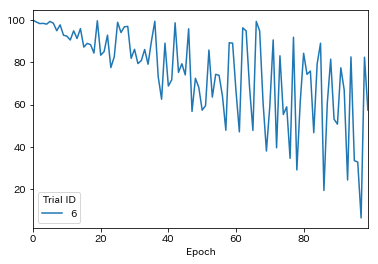

In [24]:
dummy_score.plot()

Perform another trial.

In [25]:
ex.set_parameters(a=3, b=4)
s.compute()

2019-02-28 08:08:42,434 [daskperiment.core.parameter] [INFO] Updated parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-28 08:08:42,439 [daskperiment.core.trial] [INFO] Started Experiment (trial id=7)
2019-02-28 08:08:42,445 [daskperiment.core.experiment] [INFO] Target: calculate_score-b69159d5-fbbe-4bef-8326-8e9467e3d203
2019-02-28 08:08:42,447 [daskperiment.core.experiment] [INFO] Random seed is not provided, initialized with generated seed: 2339343345
2019-02-28 08:08:42,451 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-28 08:08:42,454 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_7.py
2019-02-28 08:08:42,476 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=7)
2019-02-28 08:08:42,478 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


1.4285714285714286

To compare metrics between trials, pass multiple trial ids to `Experiment.load_metric`.

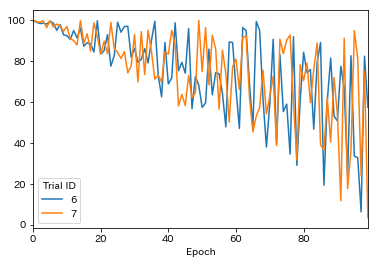

In [26]:
ex.load_metric('dummy_score', trial_id=[6, 7]).plot()

# Check code context

The above example illustrated `daskperiment` tracks code contexts decorated with `Experiment` decorators. 

To check the tracked code contexts, use `Experiment.get_code` specifying trial id (shows current code if trial id is not provided).

In [27]:
print(ex.get_code())

@ex.persist
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        ex.save_metric('dummy_score2', epoch=i, value=10)
        
    return 10 / s



In [28]:
print(ex.get_code(trial_id=1))

@ex
def prepare_data(a, b):
    return a + b 


@ex.result
def calculate_score(s):
    return 10 / s



Each code context is also saved as a text file per trial id. Thus, these are easily handled by diff tools and  Git.

In [29]:
%cat daskperiment_cache/quickstart_pj/code/quickstart_pj_1.py

# Code output saved in trial_id=1
@ex
def prepare_data(a, b):
    return a + b 


@ex.result
def calculate_score(s):
    return 10 / s


# Function purity and handling randomness

To make the experiment reproducible, all the experiment step should be "pure" function (it the inputs are the same, output shouldn't be changed). In other words, the function should not have internal state nor randomness.

`daskperiment` checks whether each experiment step is pure. It internally stores the hash of inputs and output, and shows a warning if its output is changed even though the inputs are unchanged.　

To illustrate this, add randomness to the example code.

In [30]:
@ex.result
def calculate_score(s):
    for i in range(100):
        ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
        
    return 10 / s + np.random.random()

d = prepare_data(a, b)
s = calculate_score(d)

2019-02-28 08:08:43,100 [daskperiment.core.code] [WARNING] Code context has been changed: calculate_score
2019-02-28 08:08:43,104 [daskperiment.core.code] [WARNING] @@ -2,6 +2,5 @@

2019-02-28 08:08:43,106 [daskperiment.core.code] [WARNING]  def calculate_score(s):
2019-02-28 08:08:43,108 [daskperiment.core.code] [WARNING]      for i in range(100):
2019-02-28 08:08:43,114 [daskperiment.core.code] [WARNING]          ex.save_metric('dummy_score', epoch=i, value=100 - np.random.random() * i)
2019-02-28 08:08:43,116 [daskperiment.core.code] [WARNING] -        ex.save_metric('dummy_score2', epoch=i, value=10)
2019-02-28 08:08:43,119 [daskperiment.core.code] [WARNING]          
2019-02-28 08:08:43,122 [daskperiment.core.code] [WARNING] -    return 10 / s
2019-02-28 08:08:43,123 [daskperiment.core.code] [WARNING] +    return 10 / s + np.random.random()


Because of the code change, it outputs the different results even though its inputs (parameters) are unchanged. `daskperiment` shows the warning.

In [31]:
s.compute()

2019-02-28 08:08:43,136 [daskperiment.core.trial] [INFO] Started Experiment (trial id=8)
2019-02-28 08:08:43,139 [daskperiment.core.experiment] [INFO] Target: calculate_score-ab876a38-fb06-45a9-adcc-26e95cbf32e8
2019-02-28 08:08:43,140 [daskperiment.core.experiment] [INFO] Random seed is not provided, initialized with generated seed: 3874382806
2019-02-28 08:08:43,142 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-28 08:08:43,143 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_8.py
2019-02-28 08:08:43,164 [daskperiment.core.trial] [WARNING] Experiment step result is changed with the same input: (step: calculate_score, args: (7,), kwargs: {})
2019-02-28 08:08:43,167 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=8)
2019-02-28 08:08:43,169 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


2.2891619854069374

The function outputs different result in every trial because of the randomness.
To make the function reproducible, random seed should be provided.

To do this, pass `seed` argument to `compute` method. Note that this trial shows the warning because its result is changed comparing to the previous result (no seed).

In [32]:
s.compute(seed=1)

2019-02-28 08:08:43,239 [daskperiment.core.trial] [INFO] Started Experiment (trial id=9)
2019-02-28 08:08:43,243 [daskperiment.core.experiment] [INFO] Target: calculate_score-ab876a38-fb06-45a9-adcc-26e95cbf32e8
2019-02-28 08:08:43,247 [daskperiment.core.experiment] [INFO] Random seed is initialized with given seed: 1
2019-02-28 08:08:43,249 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-28 08:08:43,252 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_9.py
2019-02-28 08:08:43,278 [daskperiment.core.trial] [WARNING] Experiment step result is changed with the same input: (step: calculate_score, args: (7,), kwargs: {})
2019-02-28 08:08:43,282 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=9)
2019-02-28 08:08:43,285 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


1.7552163303435249

Another trial with the same seed doesn't show the warning, because the result is unchanged.

In [33]:
s.compute(seed=1)

2019-02-28 08:08:43,348 [daskperiment.core.trial] [INFO] Started Experiment (trial id=10)
2019-02-28 08:08:43,352 [daskperiment.core.experiment] [INFO] Target: calculate_score-ab876a38-fb06-45a9-adcc-26e95cbf32e8
2019-02-28 08:08:43,354 [daskperiment.core.experiment] [INFO] Random seed is initialized with given seed: 1
2019-02-28 08:08:43,356 [daskperiment.core.trial] [INFO] Parameters: a=3<class 'int'>, b=4<class 'int'>
2019-02-28 08:08:43,358 [daskperiment.core.code] [INFO] Saving code context: daskperiment_cache/quickstart_pj/code/quickstart_pj_10.py
2019-02-28 08:08:43,382 [daskperiment.core.trial] [INFO] Finished Experiment (trial id=10)
2019-02-28 08:08:43,383 [daskperiment.backend.local] [INFO] Saving Experiment to file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl


1.7552163303435249

Calling `Experiment.get_history` specifying `verbose=True` returns detailed info including seed value per trials.

In [34]:
ex.get_history(verbose=True)

,a,b,Seed,Result,Result Type,Success,Finished,Process Time,Description
Trial ID,,,,,,,,,
1,1,2,2387108513,3.333333,<class 'float'>,True,2019-02-28 08:08:40.751676,00:00:00.019652,NaN
2,1,3,722428913,2.500000,<class 'float'>,True,2019-02-28 08:08:40.814038,00:00:00.042162,NaN
3,1,-1,921008217,NaN,None,False,2019-02-28 08:08:41.068351,00:00:00.042146,ZeroDivisionError(division by zero)
4,1,2,725401846,3.333333,<class 'float'>,True,2019-02-28 08:08:41.240667,00:00:00.053151,NaN
5,3,2,938377576,2.000000,<class 'float'>,True,2019-02-28 08:08:41.294752,00:00:00.026353,NaN
6,1,2,3099483958,3.333333,<class 'float'>,True,2019-02-28 08:08:41.920907,00:00:00.030488,NaN
7,3,4,2339343345,1.428571,<class 'float'>,True,2019-02-28 08:08:42.476069,00:00:00.037098,NaN
8,3,4,3874382806,2.289162,<class 'float'>,True,2019-02-28 08:08:43.167281,00:00:00.030379,NaN
9,3,4,1,1.755216,<class 'float'>,True,2019-02-28 08:08:43.282044,00:00:00.042990,NaN


# Save experiment result

`daskperiment` automatically saves its internal state when the experiment result is computed (when `.compute` is called). Also, `Experiment` instance automatically recover previous state when it is instanciated.

Following example instanciates `Experiment` instance using the same id as above. Thus, the created `Experiment` automatically recovers its state. 

In [35]:
ex_new = daskperiment.Experiment(id='quickstart_pj')

2019-02-28 08:08:43,596 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/quickstart_pj/quickstart_pj.pkl
2019-02-28 08:08:43,605 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: quickstart_pj, trial_id: 10, backend: LocalBackend('daskperiment_cache/quickstart_pj'))
2019-02-28 08:08:43,686 [daskperiment.environment.environment] [INFO] Platform Information: Darwin-17.7.0-x86_64-i386-64bit
2019-02-28 08:08:43,689 [daskperiment.environment.environment] [INFO] Device CPU Count: 4
2019-02-28 08:08:43,691 [daskperiment.environment.environment] [INFO] Python Implementation: CPython
2019-02-28 08:08:43,694 [daskperiment.environment.environment] [INFO] Python Version: 3.6.6
2019-02-28 08:08:43,695 [daskperiment.environment.environment] [INFO] Python Shell Mode: Jupyter Notebook
2019-02-28 08:08:43,697 [daskperiment.environment.environment] [INFO] Python venv: False
2019-02-28 08:08:43,699 [daskperiment.environment.environment] [

Calling `.get_history` returns information of previous trials.

In [36]:
ex_new.get_history()

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,3.333333,True,2019-02-28 08:08:40.751676,00:00:00.019652,NaN
2,1,3,2.500000,True,2019-02-28 08:08:40.814038,00:00:00.042162,NaN
3,1,-1,NaN,False,2019-02-28 08:08:41.068351,00:00:00.042146,ZeroDivisionError(division by zero)
4,1,2,3.333333,True,2019-02-28 08:08:41.240667,00:00:00.053151,NaN
5,3,2,2.000000,True,2019-02-28 08:08:41.294752,00:00:00.026353,NaN
6,1,2,3.333333,True,2019-02-28 08:08:41.920907,00:00:00.030488,NaN
7,3,4,1.428571,True,2019-02-28 08:08:42.476069,00:00:00.037098,NaN
8,3,4,2.289162,True,2019-02-28 08:08:43.167281,00:00:00.030379,NaN
9,3,4,1.755216,True,2019-02-28 08:08:43.282044,00:00:00.042990,NaN


Also, `Experiment` instance automatically detects the environment change from its previous trial. Following is a sample log when package update is detected (pandas 0.23.4 -> 0.24.0).

    2019-01-29 00:22:35,357 [daskperiment.io.serialize] [INFO] Loaded Experiment(id: quickstart_pj, trial_id: 14) from path=daskperiment_cache/quickstart_pj/quickstart_pj.pkl
    2019-01-29 00:22:35,404 [daskperiment.core.environment] [WARNING] Installed Python packages have been changed
    2019-01-29 00:22:35,408 [daskperiment.core.environment] [WARNING] @@ -142 +142 @@
    2019-01-29 00:22:35,411 [daskperiment.core.environment] [WARNING] -pandas 0.23.4 (/Users/sinhrks/anaconda/lib/python3.6/site-packages)
    2019-01-29 00:22:35,412 [daskperiment.core.environment] [WARNING] +pandas 0.24.0 (/Users/sinhrks/anaconda/lib/python3.6/site-packages)

# Run as CLI

`daskperiment` also supports execution from command line. First, prepare a `Python` script to define experiment. The usage of `Experiment` class is all the same as Jupyter example. `daskperiment` regards a result of a function decorated with `Experiment.result` (`calculate_score` function in below case) as experiment output.

In [37]:
%cat ../scripts/simple_experiment.py

import daskperiment

ex = daskperiment.Experiment(id='simple_experiment_pj')

a = ex.parameter('a')
b = ex.parameter('b')


@ex
def prepare_data(a, b):
    return a + b


@ex.result
def calculate_score(s):
    return s + 1


d = prepare_data(a, b)
calculate_score(d)


You can provide parameter values from command line options using `key=value` format. `daskperinemt` automatically parse parameters and perform computation.

In [38]:
!python ../scripts/simple_experiment.py a=1 b=2

/Users/masaaki.horikoshi/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
2019-02-28 08:08:48,186 [daskperiment.core.experiment] [INFO] Initialized new experiment: Experiment(id: simple_experiment_pj, trial_id: 0, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-28 08:08:48,322 [daskperiment.environment.environment] [INFO] Platform Information: Darwin-17.7.0-x86_64-i386-64bit
2019-02-28 08:08:48,322 [daskperiment.environment.environment] [INFO] Device CPU Count: 4
2019-02-28 08:08:48,323 [daskperiment.environment.environment] [INFO] Python Implementation: CPython
2019-02-28 08:08:48,323 [daskperiment.environment.environment] [INFO] Python Version: 3.6.6
2019-02-28 08:08:48,323 [daskperiment.environment.environment] [INFO] Python Shell Mode: File
2019-02-28 08:08:48,323 [daskperiment.environment.environment] [INFO] Python venv: False
20

Let's perform multiple trials using different parameters. `daskperiment` automatically saves trial history as the same as Jupyter example (see trial id is incremented).

In [39]:
!python ../scripts/simple_experiment.py a=3 b=2

/Users/masaaki.horikoshi/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
2019-02-28 08:08:52,341 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-28 08:08:52,341 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: simple_experiment_pj, trial_id: 1, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-28 08:08:52,467 [daskperiment.environment.environment] [INFO] Platform Information: Darwin-17.7.0-x86_64-i386-64bit
2019-02-28 08:08:52,468 [daskperiment.environment.environment] [INFO] Device CPU Count: 4
2019-02-28 08:08:52,468 [daskperiment.environment.environment] [INFO] Python Implementation: CPython
2019-02-28 08:08:52,468 [daskperiment.environment.environment] [INFO] Python Version: 3.6.6
2019-02-28 08:08:52,468 [daskp

To confirm the experiment results, instanciate Experiment specifying the same id as the script and use Experiment.get_history.

In [40]:
import daskperiment

ex = daskperiment.Experiment(id='simple_experiment_pj')
ex.get_history()

2019-02-28 08:08:53,082 [daskperiment.backend.local] [INFO] Loading Experiment from file: daskperiment_cache/simple_experiment_pj/simple_experiment_pj.pkl
2019-02-28 08:08:53,086 [daskperiment.core.experiment] [INFO] Loaded existing experiment: Experiment(id: simple_experiment_pj, trial_id: 2, backend: LocalBackend('daskperiment_cache/simple_experiment_pj'))
2019-02-28 08:08:53,147 [daskperiment.environment.environment] [INFO] Platform Information: Darwin-17.7.0-x86_64-i386-64bit
2019-02-28 08:08:53,150 [daskperiment.environment.environment] [INFO] Device CPU Count: 4
2019-02-28 08:08:53,153 [daskperiment.environment.environment] [INFO] Python Implementation: CPython
2019-02-28 08:08:53,155 [daskperiment.environment.environment] [INFO] Python Version: 3.6.6
2019-02-28 08:08:53,161 [daskperiment.environment.environment] [INFO] Python Shell Mode: Jupyter Notebook
2019-02-28 08:08:53,163 [daskperiment.environment.environment] [INFO] Python venv: False
2019-02-28 08:08:53,167 [daskperiment

,a,b,Result,Success,Finished,Process Time,Description
Trial ID,,,,,,,
1,1,2,4,True,2019-02-28 08:08:48.339392,00:00:00.010890,NaN
2,3,2,6,True,2019-02-28 08:08:52.509214,00:00:00.023474,NaN
